In [1]:
import insightface
from insightface.app import FaceAnalysis
import cv2
import os
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insightface.__version__

'0.5'

In [3]:
app = FaceAnalysis(allowed_modules=['detection','recognition'])

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/fastai/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/fastai/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/fastai/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/fastai/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/fastai/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5


In [4]:
ctx_id = -1 # use CPU
# ctx_id = 0 use CUDA device
app.prepare(ctx_id=ctx_id)

set det-size: (640, 640)


In [5]:
image_train_path = '../data/train/'
image_test_path = '../data/test/'
image_dir_path = '../data/train/'

names = [ name for name in os.listdir(image_dir_path) if os.path.isdir(os.path.join(image_train_path, name)) ]
print(names)

['Venus_Williams', 'Vanessa_Incontrada', 'Zinedine_Zidane', 'Sandra_Bullock', 'Ben_Affleck', 'Ellen_Engleman', 'Madonna', 'Serena_Williams', 'Elton_John', 'Tom_Ridge']


In [6]:
# faces
faces_emb = []
label = []
for idx, name in enumerate(names):
    
    name_dir = image_dir_path + name
    image_filepaths = [os.path.join(name_dir, f)
                       for f in os.listdir(name_dir)]
    #print(image_filepaths)
    
    for image_file_path in image_filepaths:
        image = cv2.imread(image_file_path)
        faces = app.get(image)
        
        # Take only pictures with one face detected
        if len(faces) == 1:
            emb = faces[0].embedding
            faces_emb.append(emb)
            label.append(name)
            #print(faces[0].embedding)
        #print("Found %d faces" % len(faces))
    #break

In [7]:
len(faces_emb)

121

In [8]:
len(label)

121

In [9]:
# Convert to Numpy array
faces_emb_train_np = np.array(faces_emb)
# define the labels
label_emb_train_np = np.array(label)

In [10]:
faces_emb_train_np.shape

(121, 512)

In [11]:
# instantiate the tsne 
# https://towardsdatascience.com/why-you-are-using-t-sne-wrong-502412aab0c0
tsne = TSNE(n_iter=1500, n_components=2, perplexity=10)

In [12]:
embs_tsne = tsne.fit_transform(faces_emb_train_np)

## Visualisation of the embeddings space

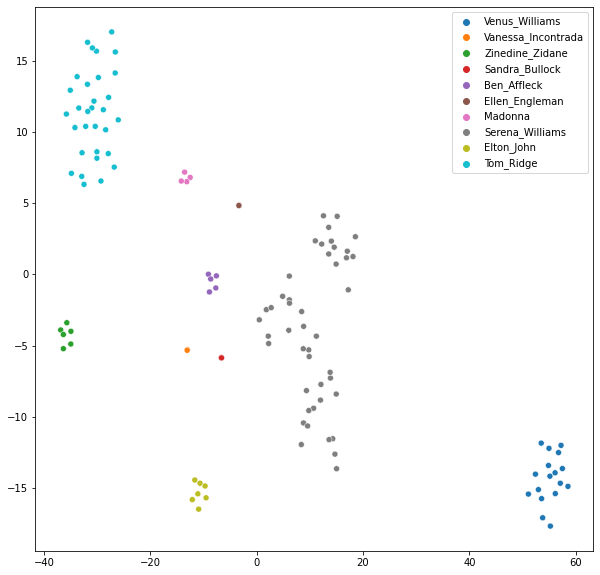

In [13]:
import mpld3
mpld3.enable_notebook()

x = embs_tsne[:, 0]
y = embs_tsne[:, 1]
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=x, y=y, hue=label_emb_train_np)
plt.show()